<a href="https://colab.research.google.com/github/YousefAbyss/2022-Fall/blob/main/StatMech_project01/MD_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann

In [ ]:
mass_of_argon = 39.948 #  amu

* Lennard-Jones potential:
$$E_{attractive}(r) = -4𝜀(\frac{\sigma}{r})^{6}$$

$$E_{repulsive}(r) = 4𝜀(\frac{\sigma}{r})^{12}$$

$$E(r) = E_{repulsive}(r) + E_{attractive}(r)$$

$$f(r) = -\frac{∂E(r)}{∂r}$$

In [1]:
def lj_force(r, epsilon, sigma):

    attractive = 24 * epsilon * np.power(sigma, 6) / np.power(r, 7)
    repulsive = 48 * epsilon * np.power(sigma, 12) / np.power(r, 13)
    return repulsive - attractive

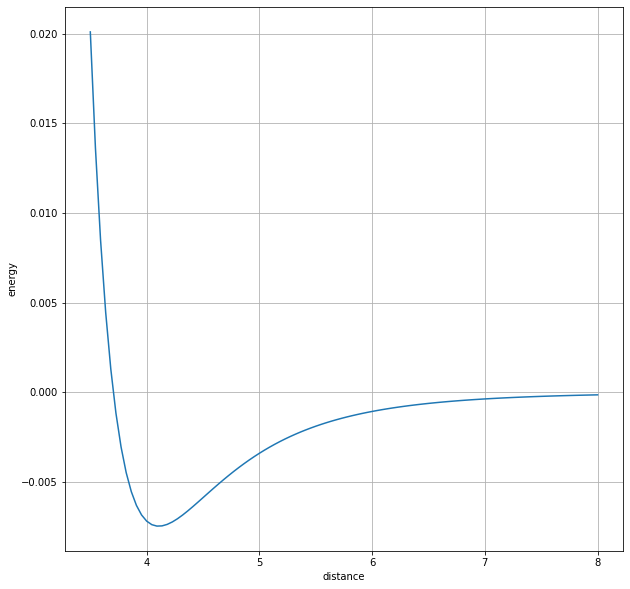

In [19]:
r = np.linspace(3.5, 8, 100)
plt.figure(figsize=(10, 10))
plt.plot(r, lj_force(r, 0.0103, 3.3))
plt.xlabel('distance')
plt.ylabel('energy')
plt.grid('True')
plt.show()

* Velocity Verlet algorithm:
$${x}_i(t + \Delta t) = {x}_i(t) + {v}_i(t) \Delta t + \frac{1}{2}{a}_i(t)\Delta t^2$$
$${v}_i(t + \Delta t) = {v}_i(t) + \frac{1}{2}[{a}_i(t) + {a}_i(t + \Delta t)]\Delta t$$

In [ ]:
def update_pos(x, v, a, dt):

    return x + v * dt + 0.5 * a * dt * dt


def update_velo(v, a, a1, dt):

    return v + 0.5 * (a + a1) * dt

In [ ]:
def init_velocity(T, number_of_particles):

    R = np.random.rand(number_of_particles) - 0.5
    return R * np.sqrt(Boltzmann * T / (mass_of_argon * 1.602e-19))


def get_accelerations(positions, epsilon, sigma):

    accel_x = np.zeros((positions.size, positions.size))
    for i in range(0, positions.size - 1):
        for j in range(i + 1, positions.size):
            r_x = positions[j] - positions[i]
            rmag = np.sqrt(r_x * r_x)
            force_scalar = lj_force(rmag, epsilon, sigma)
            force_x = force_scalar * r_x / rmag
            accel_x[i, j] = force_x / mass_of_argon
            accel_x[j, i] = - force_x / mass_of_argon
    return np.sum(accel_x, axis=0)


def run_md(dt, steps, initial_temp, x, n_particle, epsilon, sigma):

    positions = np.zeros((steps, n_particle))
    v = init_velocity(initial_temp, n_particle)
    a = get_accelerations(x, epsilon, sigma)
    for i in range(steps):
        x = update_pos(x, v, a, dt)
        a1 = get_accelerations(x, epsilon, sigma)
        v = update_velo(v, a, a1, dt)
        a = np.array(a1)
        positions[i, :] = x
    return positions

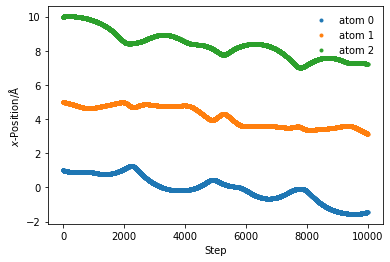

In [ ]:
x = np.array([1, 5, 10])
T = 100
sim_pos = run_md(0.1, 10000, initial_temp=T, x=x, n_particle=3, epsilon=0.0103, sigma=3.4)
    
for i in range(sim_pos.shape[1]):
    plt.plot(sim_pos[:, i], '.', label='atom {}'.format(i))
plt.xlabel(r'Step')
plt.ylabel(r'$x$-Position/Å')
plt.legend(frameon=False)
plt.show()

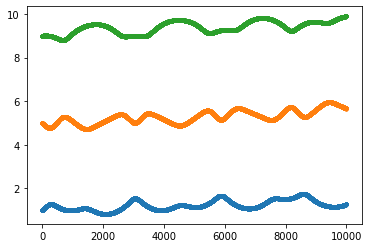

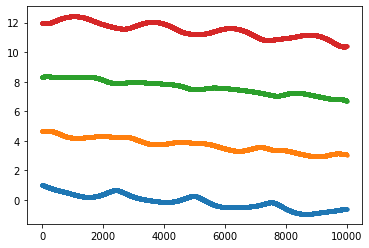

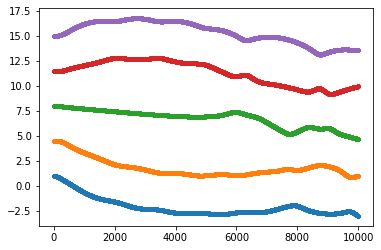

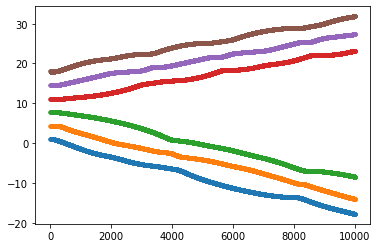

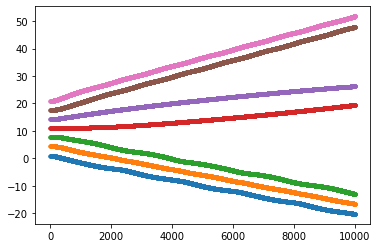

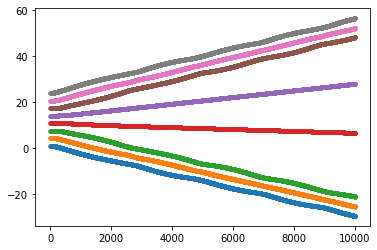

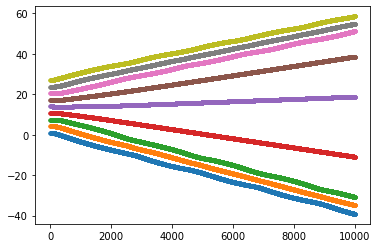

In [ ]:
T = 300
for i in range(3, 10):
    x = np.linspace(1, 3*i, i)
    sim_pos = run_md(dt=0.1, steps=10000, initial_temp=T, x=x, n_particle=i, epsilon=0.0103, sigma=3.4)
    plt.figure()
    for j in range(i):
      plt.plot(sim_pos[:, j], '.', label='atom {}'.format(i))
plt.show()

T:  100
T:  2600
T:  5100
T:  7600


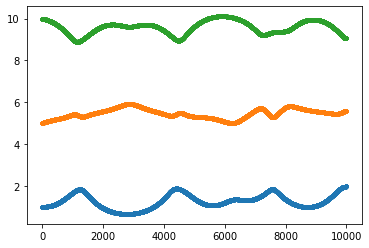

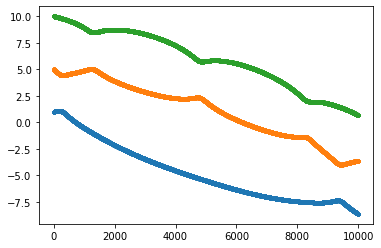

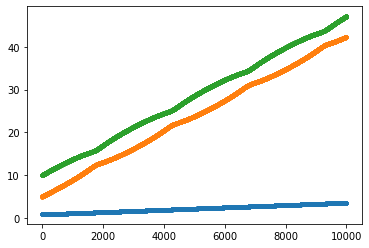

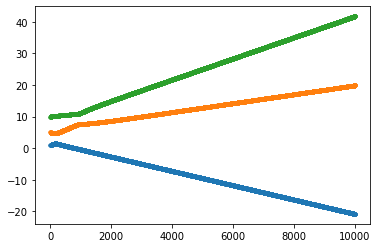

In [ ]:
x = np.array([1, 5, 10])
for T in range(1, 100, 25):
    sim_pos = run_md(dt=0.1, steps=10000, initial_temp=T*100, x=x, n_particle=3, epsilon=0.0103, sigma=3.4)
    plt.figure()
    for j in range(3):
      plt.plot(sim_pos[:, j], '.')
    print('T: ', T*100)
plt.show()

epsilon:  0.01
epsilon:  0.02
epsilon:  0.03
epsilon:  0.04
epsilon:  0.05
epsilon:  0.06
epsilon:  0.07
epsilon:  0.08
epsilon:  0.09


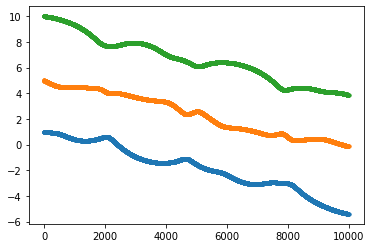

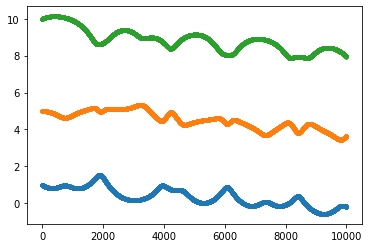

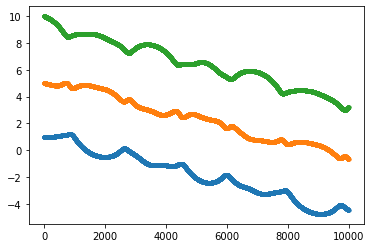

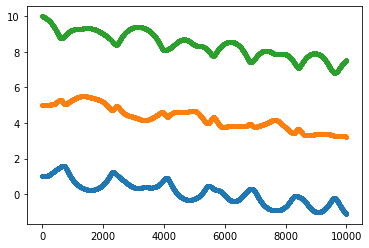

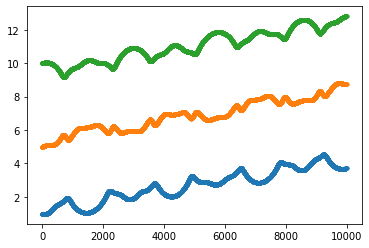

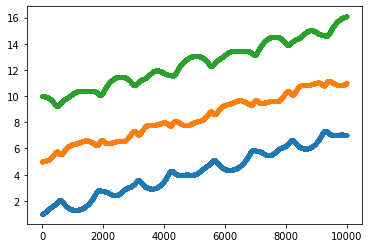

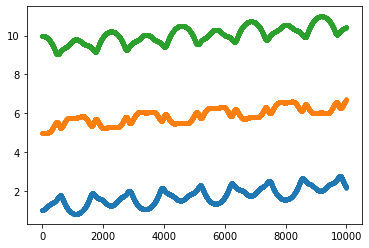

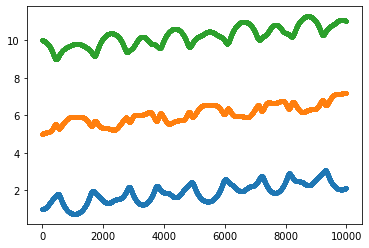

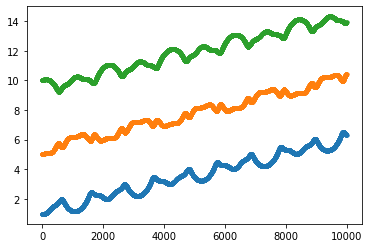

In [ ]:
x = np.array([1, 5, 10])
T = 300
for ep in range(1, 10):
    sim_pos = run_md(dt=0.1, steps=10000, initial_temp=T, x=x, n_particle=3, epsilon=ep*0.01, sigma=3.4)
    plt.figure()
    for j in range(3):
      plt.plot(sim_pos[:, j], '.')
    print('epsilon: ', ep*0.01)
plt.show()

sigma:  3.4
sigma:  3.5
sigma:  3.6
sigma:  3.7
sigma:  3.8
sigma:  3.9
sigma:  4.0
sigma:  4.1
sigma:  4.2
sigma:  4.3


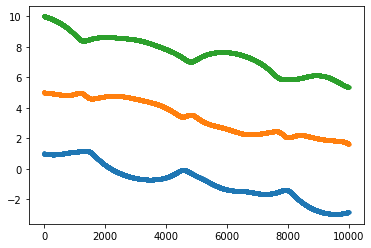

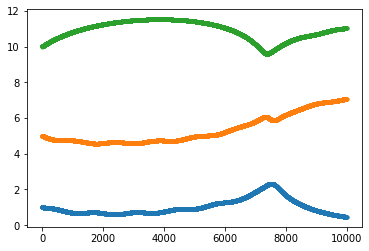

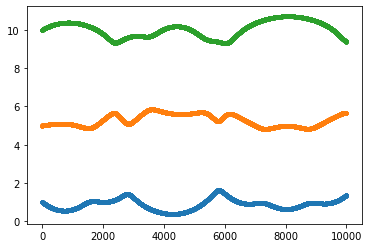

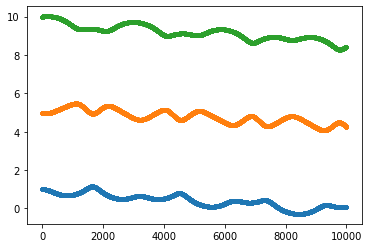

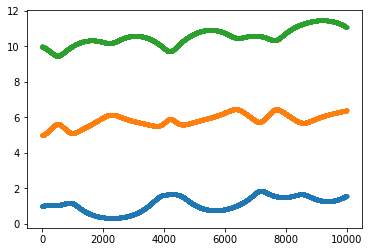

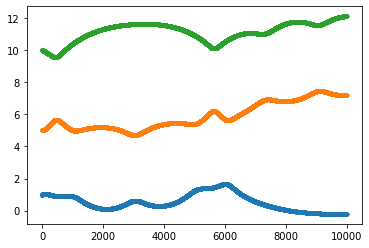

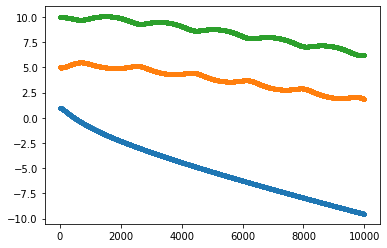

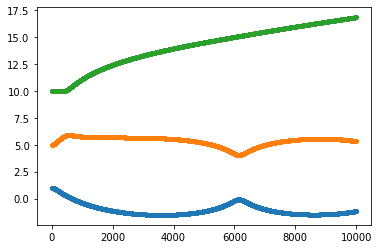

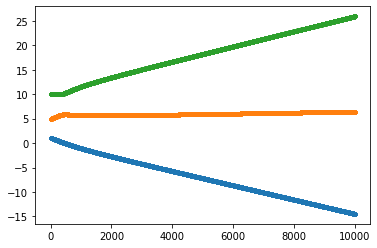

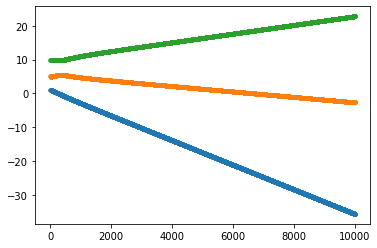

In [ ]:
x = np.array([1, 5, 10])
T = 300
ep = 0.0103
for sig in range(4, 14, 1):
    sim_pos = run_md(dt=0.1, steps=10000, initial_temp=T, x=x, n_particle=3, epsilon=ep, sigma=3 + sig * 0.1)
    plt.figure()
    for j in range(3):
      plt.plot(sim_pos[:, j], '.')
    print('sigma: ', 3 + sig * 0.1)
plt.show()